# CCLAMP Diachronic Network

In [1]:
# Import packages
import pandas as pd
import numpy as np
from itertools import combinations

# Read data
mentions_and_authors.txt and metadata

In [2]:
# Read mentions
mentions = pd.read_csv("mentions_and_authors.txt", sep="\t", encoding='utf-8')
mentions.head(10)

,File,Mentions,Year,Title,Author,DOB,POB,DOD,POD,Link,Gender
0,GEM_1925_3,Joep Nicolas,1925,Sint Maartensavond Bij een linoleumsnede van J...,Joep Nicolas,6 oktober 1897,NaN,25 juli 1972,Steyl,https://www.dbnl.org/auteurs/auteur.php?id=nic...,male
1,GEM_1925_5,Hendrik Andriessen,1925,Is de nieuwe meerstemmige kerkmuziek in Nederl...,Albert Helman,7 november 1903,Paramaribo,10 juli 1996,Amsterdam,https://www.dbnl.org/auteurs/auteur.php?id=hel...,male
2,GEM_1925_6,Willem Nieuwenhuis,1925,Dagelijksch brood en dagelijksch leven.,Willem Nieuwenhuis,1886,NaN,1935,NaN,https://www.dbnl.org/auteurs/auteur.php?id=nie...,male
3,GEM_1925_7,Karel van den Oever,1925,In Memoriam Fratris,Karel van den Oever,19 november 1879,Antwerpen,6 oktober 1926,Antwerpen,https://www.dbnl.org/auteurs/auteur.php?id=oev...,male
4,GEM_1925_9,Wies Moens,1925,Koraal.,Wies Moens,28 januari 1898,Sint-Gillis-Bij-Dendermonde,5 februari 1982,Geleen,https://www.dbnl.org/auteurs/auteur.php?id=moe...,male
5,GEM_1925_11,Henri Bruning,1925,Jonge litteratuur,Henk Kuitenbrouwer; Jan Bruna,20 november 1903; 17 augustus 1876,NaN,3 augustus 1974; 11 maart 1931,NaN,https://www.dbnl.org/auteurs/auteur.php?id=kui...,mixed
6,GEM_1925_11,Joep Nicolas,1925,Jonge litteratuur,Henk Kuitenbrouwer; Jan Bruna,20 november 1903; 17 augustus 1876,NaN,3 augustus 1974; 11 maart 1931,NaN,https://www.dbnl.org/auteurs/auteur.php?id=kui...,mixed
7,GEM_1925_11,Albert Kuyle,1925,Jonge litteratuur,Henk Kuitenbrouwer; Jan Bruna,20 november 1903; 17 augustus 1876,NaN,3 augustus 1974; 11 maart 1931,NaN,https://www.dbnl.org/auteurs/auteur.php?id=kui...,mixed
8,GEM_1925_11,Albe,1925,Jonge litteratuur,Henk Kuitenbrouwer; Jan Bruna,20 november 1903; 17 augustus 1876,NaN,3 augustus 1974; 11 maart 1931,NaN,https://www.dbnl.org/auteurs/auteur.php?id=kui...,mixed
9,GEM_1925_12,Carel Scharten,1925,Kroniek,Jan Engelman; Willem Maas; Albert Kuyle; Jan B...,7 juni 1900; 28 april 1897; 17 februari 1904; ...,NaN,20 maart 1972; 6 mei 1950; 4 maart 1958; 11 ma...,NaN,https://www.dbnl.org/auteurs/auteur.php?id=eng...,mixed


In [3]:
# Add new column with Era
# Creating custom intervals
conditions = [
    (mentions['Year'] < 1900),
    (mentions['Year'] >= 1900) & (mentions['Year'] <= 1950),
    (mentions['Year'] > 1950)
]

choices = ['Pre-1900s', '1900s-1950s', 'Post-1950s']

mentions['Era'] = np.select(conditions, choices, default='Other')

mentions.head(10)

,File,Mentions,Year,Title,Author,DOB,POB,DOD,POD,Link,Gender,Era
0,GEM_1925_3,Joep Nicolas,1925,Sint Maartensavond Bij een linoleumsnede van J...,Joep Nicolas,6 oktober 1897,NaN,25 juli 1972,Steyl,https://www.dbnl.org/auteurs/auteur.php?id=nic...,male,1900s-1950s
1,GEM_1925_5,Hendrik Andriessen,1925,Is de nieuwe meerstemmige kerkmuziek in Nederl...,Albert Helman,7 november 1903,Paramaribo,10 juli 1996,Amsterdam,https://www.dbnl.org/auteurs/auteur.php?id=hel...,male,1900s-1950s
2,GEM_1925_6,Willem Nieuwenhuis,1925,Dagelijksch brood en dagelijksch leven.,Willem Nieuwenhuis,1886,NaN,1935,NaN,https://www.dbnl.org/auteurs/auteur.php?id=nie...,male,1900s-1950s
3,GEM_1925_7,Karel van den Oever,1925,In Memoriam Fratris,Karel van den Oever,19 november 1879,Antwerpen,6 oktober 1926,Antwerpen,https://www.dbnl.org/auteurs/auteur.php?id=oev...,male,1900s-1950s
4,GEM_1925_9,Wies Moens,1925,Koraal.,Wies Moens,28 januari 1898,Sint-Gillis-Bij-Dendermonde,5 februari 1982,Geleen,https://www.dbnl.org/auteurs/auteur.php?id=moe...,male,1900s-1950s
5,GEM_1925_11,Henri Bruning,1925,Jonge litteratuur,Henk Kuitenbrouwer; Jan Bruna,20 november 1903; 17 augustus 1876,NaN,3 augustus 1974; 11 maart 1931,NaN,https://www.dbnl.org/auteurs/auteur.php?id=kui...,mixed,1900s-1950s
6,GEM_1925_11,Joep Nicolas,1925,Jonge litteratuur,Henk Kuitenbrouwer; Jan Bruna,20 november 1903; 17 augustus 1876,NaN,3 augustus 1974; 11 maart 1931,NaN,https://www.dbnl.org/auteurs/auteur.php?id=kui...,mixed,1900s-1950s
7,GEM_1925_11,Albert Kuyle,1925,Jonge litteratuur,Henk Kuitenbrouwer; Jan Bruna,20 november 1903; 17 augustus 1876,NaN,3 augustus 1974; 11 maart 1931,NaN,https://www.dbnl.org/auteurs/auteur.php?id=kui...,mixed,1900s-1950s
8,GEM_1925_11,Albe,1925,Jonge litteratuur,Henk Kuitenbrouwer; Jan Bruna,20 november 1903; 17 augustus 1876,NaN,3 augustus 1974; 11 maart 1931,NaN,https://www.dbnl.org/auteurs/auteur.php?id=kui...,mixed,1900s-1950s
9,GEM_1925_12,Carel Scharten,1925,Kroniek,Jan Engelman; Willem Maas; Albert Kuyle; Jan B...,7 juni 1900; 28 april 1897; 17 februari 1904; ...,NaN,20 maart 1972; 6 mei 1950; 4 maart 1958; 11 ma...,NaN,https://www.dbnl.org/auteurs/auteur.php?id=eng...,mixed,1900s-1950s


In [4]:
# Read the metadata file
metadata = pd.read_csv("C-CLAMP_metadata_gender.txt", sep="\t", encoding='utf-8')
metadata.head(10)

,File,Year,Title,Author,DOB,POB,DOD,POD,Link,Gender
0,GEM_1925_1,1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GEM_1925_2,1925,Gedachten over architectuur.,Jan Engelman; Willem Maas,7 juni 1900; 28 april 1897,Utrecht; Utrecht,20 maart 1972; 6 mei 1950,Amsterdam; Utrecht,https://www.dbnl.org/auteurs/auteur.php?id=eng...,mixed
2,GEM_1925_3,1925,Sint Maartensavond Bij een linoleumsnede van J...,Joep Nicolas,6 oktober 1897,NaN,25 juli 1972,Steyl,https://www.dbnl.org/auteurs/auteur.php?id=nic...,male
3,GEM_1925_4,1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GEM_1925_5,1925,Is de nieuwe meerstemmige kerkmuziek in Nederl...,Albert Helman,7 november 1903,Paramaribo,10 juli 1996,Amsterdam,https://www.dbnl.org/auteurs/auteur.php?id=hel...,male
5,GEM_1925_6,1925,Dagelijksch brood en dagelijksch leven.,Willem Nieuwenhuis,1886,NaN,1935,NaN,https://www.dbnl.org/auteurs/auteur.php?id=nie...,male
6,GEM_1925_7,1925,In Memoriam Fratris,Karel van den Oever,19 november 1879,Antwerpen,6 oktober 1926,Antwerpen,https://www.dbnl.org/auteurs/auteur.php?id=oev...,male
7,GEM_1925_8,1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,GEM_1925_9,1925,Koraal.,Wies Moens,28 januari 1898,Sint-Gillis-Bij-Dendermonde,5 februari 1982,Geleen,https://www.dbnl.org/auteurs/auteur.php?id=moe...,male
9,GEM_1925_10,1925,De gemeenschap der volkeren.,Eduard A. Serrarens,27 december 1895,Maastricht,25 november 1955,Roermond,https://www.dbnl.org/auteurs/auteur.php?id=ser...,male


In [5]:
# Add Era to metadata
# Creating custom intervals
conditions = [
    (metadata['Year'] < 1900),
    (metadata['Year'] >= 1900) & (metadata['Year'] <= 1950),
    (metadata['Year'] > 1950)
]

choices = ['Pre-1900s', '1900s-1950s', 'Post-1950s']

metadata['Era'] = np.select(conditions, choices, default='Other')

metadata.head(10)

,File,Year,Title,Author,DOB,POB,DOD,POD,Link,Gender,Era
0,GEM_1925_1,1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900s-1950s
1,GEM_1925_2,1925,Gedachten over architectuur.,Jan Engelman; Willem Maas,7 juni 1900; 28 april 1897,Utrecht; Utrecht,20 maart 1972; 6 mei 1950,Amsterdam; Utrecht,https://www.dbnl.org/auteurs/auteur.php?id=eng...,mixed,1900s-1950s
2,GEM_1925_3,1925,Sint Maartensavond Bij een linoleumsnede van J...,Joep Nicolas,6 oktober 1897,NaN,25 juli 1972,Steyl,https://www.dbnl.org/auteurs/auteur.php?id=nic...,male,1900s-1950s
3,GEM_1925_4,1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900s-1950s
4,GEM_1925_5,1925,Is de nieuwe meerstemmige kerkmuziek in Nederl...,Albert Helman,7 november 1903,Paramaribo,10 juli 1996,Amsterdam,https://www.dbnl.org/auteurs/auteur.php?id=hel...,male,1900s-1950s
5,GEM_1925_6,1925,Dagelijksch brood en dagelijksch leven.,Willem Nieuwenhuis,1886,NaN,1935,NaN,https://www.dbnl.org/auteurs/auteur.php?id=nie...,male,1900s-1950s
6,GEM_1925_7,1925,In Memoriam Fratris,Karel van den Oever,19 november 1879,Antwerpen,6 oktober 1926,Antwerpen,https://www.dbnl.org/auteurs/auteur.php?id=oev...,male,1900s-1950s
7,GEM_1925_8,1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900s-1950s
8,GEM_1925_9,1925,Koraal.,Wies Moens,28 januari 1898,Sint-Gillis-Bij-Dendermonde,5 februari 1982,Geleen,https://www.dbnl.org/auteurs/auteur.php?id=moe...,male,1900s-1950s
9,GEM_1925_10,1925,De gemeenschap der volkeren.,Eduard A. Serrarens,27 december 1895,Maastricht,25 november 1955,Roermond,https://www.dbnl.org/auteurs/auteur.php?id=ser...,male,1900s-1950s


# Create subsets per Era

In [6]:
# Create subsets of the mentions for each Era and store them as separate DataFrames
Era_dataframes = {}

for Era in mentions['Era'].unique():
    subset = mentions[mentions['Era'] == Era]
    dataframe_name = f"{Era}"  # Creating a dynamic name for the DataFrame
    subset_dataframe = pd.DataFrame(subset.values, columns=subset.columns)  # Creating a new DataFrame
    Era_dataframes[dataframe_name] = subset_dataframe

# Print subsets
for Era, dataframe in Era_dataframes.items():
    print(f"DataFrame for Era {Era}s:")
    print(dataframe)
    print("\n")


DataFrame for Era 1900s-1950ss:
              File             Mentions  Year  \
0       GEM_1925_3         Joep Nicolas  1925   
1       GEM_1925_5   Hendrik Andriessen  1925   
2       GEM_1925_6   Willem Nieuwenhuis  1925   
3       GEM_1925_7  Karel van den Oever  1925   
4       GEM_1925_9           Wies Moens  1925   
...            ...                  ...   ...   
50121  STR_1947_99             Henricus  1947   
50122  STR_1947_99           M. Huybens  1947   
50123  STR_1947_99             R. Leijs  1947   
50124  STR_1947_99                 Léon  1947   
50125  STR_1947_99             Horatius  1947   

                                                   Title  \
0      Sint Maartensavond Bij een linoleumsnede van J...   
1      Is de nieuwe meerstemmige kerkmuziek in Nederl...   
2                Dagelijksch brood en dagelijksch leven.   
3                                    In Memoriam Fratris   
4                                                Koraal.   
...                

In [7]:
# Create subsets of the metadata file per Era
Era_metadata_dataframes = {}

for Era in metadata['Era'].unique():
    subset = metadata[metadata['Era'] == Era]
    dataframe_name = f"metadata_Era_{Era}"  # Creating a dynamic name for the DataFrame
    subset_dataframe = pd.DataFrame(subset.values, columns=subset.columns)  # Creating a new DataFrame
    Era_metadata_dataframes[dataframe_name] = subset_dataframe

# Print subsets
for Era, dataframe in Era_metadata_dataframes.items():
    print(f"DataFrame for Era {Era}s:")
    print(dataframe)
    print("\n")

DataFrame for Era metadata_Era_1900s-1950ss:
               File  Year                                              Title  \
0        GEM_1925_1  1925                                                NaN   
1        GEM_1925_2  1925                       Gedachten over architectuur.   
2        GEM_1925_3  1925  Sint Maartensavond Bij een linoleumsnede van J...   
3        GEM_1925_4  1925                                                NaN   
4        GEM_1925_5  1925  Is de nieuwe meerstemmige kerkmuziek in Nederl...   
...             ...   ...                                                ...   
21773   STR_1947_96  1947  Economische kroniek Groot-Brittannie's betalin...   
21774   STR_1947_97  1947  Internationale kroniek Frankrijks roeping door...   
21775   STR_1947_98  1947         Kroniek der tijdschriften door G. de Vocht   
21776   STR_1947_99  1947                                     Boekbespreking   
21777  STR_1947_100  1947                                                Na

# Calculate the weights per Era

In [8]:
# Create coauthor x coauthor pairs

Era_coauthors_dataframes = {}

# Function to get combinations of authors
def get_author_combinations(row):
    authors = row['Author'].split('; ')
    return list(combinations(authors, 2))  # Change the number inside combinations() for different combinations

for Era, dataframe in Era_metadata_dataframes.items():
    # Create coauthors_df
    coauthors_df = dataframe[['Author']].copy()

    # Filter out rows with only 1 author
    df_filtered = coauthors_df[coauthors_df['Author'].str.count(';') > 0]
    
    # Apply the function to each row: this will create a new column 'Author Combinations' with a list of combinations for each row
    df_filtered['Author Combinations'] = df_filtered.apply(get_author_combinations, axis=1)

    # Assuming df_filtered is your DataFrame with author combinations

    # Create an empty list to store the combinations
    combinations_list = []

    # Iterate through each row and extract combinations
    for _, row in df_filtered.iterrows():
        combinations_list.extend(row['Author Combinations'])
    
    dataframe_name = f"coauthors_{Era}"
    Era_coauthors_dataframes[dataframe_name] = pd.DataFrame(combinations_list, columns=['Author', 'Coauthor'])
    
for Era, dataframe in Era_coauthors_dataframes.items():
    print(f"DataFrame for Era {Era}s:")
    print(dataframe)
    print("\n")

C:\Users\u0149275\AppData\Local\Temp\ipykernel_2516\2515183104.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Author Combinations'] = df_filtered.apply(get_author_combinations, axis=1)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_2516\2515183104.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Author Combinations'] = df_filtered.apply(get_author_combinations, axis=1)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_2516\2515183104.py:18: SettingWithCopyWarning: 
A value i

DataFrame for Era coauthors_metadata_Era_1900s-1950ss:
                   Author            Coauthor
0            Jan Engelman         Willem Maas
1      Henk Kuitenbrouwer           Jan Bruna
2            Jan Engelman         Willem Maas
3            Jan Engelman        Albert Kuyle
4            Jan Engelman           Jan Bruna
...                   ...                 ...
16305            J. Hoing  Hendrik Imberechts
16306            J. Hoing            H. Aerts
16307       Flor Kielbaey  Hendrik Imberechts
16308       Flor Kielbaey            H. Aerts
16309  Hendrik Imberechts            H. Aerts

[16310 rows x 2 columns]


DataFrame for Era coauthors_metadata_Era_Pre-1900ss:
                                         Author              Coauthor
0                    Henry Wadsworth Longfellow        E.J. Potgieter
1                               Petrus de Raadt  Jan Gerhardus Ottema
2                                     P.J. Veth    W.J.C. van Hasselt
3                               

In [9]:
# Add weights to create directed network

# Create a dictionary to store DataFrames for each era
network_dataframes = {}

for Era, dataframe in Era_dataframes.items():
    # Create dataframe pairs_df with only the authors and the mentions
    pairs_df = dataframe[['Mentions', 'Author']]

    # Rename to target and source
    pairs_df = pairs_df.rename(columns={'Mentions': 'Target', 'Author': 'Source'})

    # Sort rows columnwise
    pairs_df = pd.DataFrame(np.sort(pairs_df.values, axis=1), columns=pairs_df.columns)

    # Remove rows where mention and author have the same value
    pairs_df = pairs_df[pairs_df['Source'] != pairs_df['Target']]

    # Add the coauthors with both authors as sources and targets
    dec = Era.split("_")
    coauthors_df = Era_coauthors_dataframes["coauthors_metadata_Era_" + str(dec[-1])]
    coauthors_df = coauthors_df.rename(columns={'Author': 'Target', 'Coauthor': 'Source'})
    coauthors_df['Weight'] = 1  # Assign a weight of 1 for coauthors
    coauthors_df_reverse = coauthors_df.rename(columns={'Source': 'Target', 'Target': 'Source'})  # Reverse Source and Target
    coauthors_df = pd.concat([coauthors_df, coauthors_df_reverse], ignore_index=True)

    # Identify duplications
    coauthors_df['Weight'] = 1
    coauthors_df = coauthors_df.groupby(['Target', 'Source'], sort=False, as_index=False).sum()

    # Combine pairs_df and coauthors_df
    pairs_df = pd.concat([pairs_df, coauthors_df], ignore_index=True)

    # Exclude pairs that occur less than 5 times
    pairs_df = pairs_df[pairs_df['Weight'] >= 5]
    
    # Store the resulting DataFrame in the dictionary
    network_dataframes[Era] = pairs_df
    

In [10]:
for era, df in network_dataframes.items():
    print(era)
    print(df)

1900s-1950s
                        Target                       Source  Weight
41386             Jan Engelman                  Willem Maas     7.0
41387       Henk Kuitenbrouwer                    Jan Bruna     8.0
41388             Jan Engelman                 Albert Kuyle    15.0
41389             Jan Engelman                    Jan Bruna     7.0
41390             Jan Engelman           Henk Kuitenbrouwer    13.0
...                        ...                          ...     ...
58335  K. du Bois de Vroylande               Louis Sterkens     5.0
58372           Jos. Burvenich           E.J. Vandenbussche     5.0
58408                L. Baudez              Albert Deblaere     5.0
58434         Jozef Andriessen            Emiel Jan Janssen     5.0
58830  K. du Bois de Vroylande  Paul Maria Jozef de Meester     6.0

[1114 rows x 3 columns]
Pre-1900s
                              Target                          Source  Weight
4667                       P.J. Veth              W.J.C. van

# Filter by date of birth of the target

In [11]:
# Filter the networks by the date of birth of the target: throw away targets born before 1700
import re

DOB_df = pd.read_csv("author_DOB_list.txt", sep="\t", encoding='utf-8')

# loop over the three era's
for era, df in network_dataframes.items():
    # Identify rows to drop
    rows_to_drop = []
    
    df = pd.merge(df, DOB_df, left_on='Target', right_on='Author', how='left')

    # Throw out targets born before 1700
    for index, row in df.iterrows():
        dob_value = row['DOB']

        if pd.isna(dob_value):
            # Skip rows with NaN values in 'DOB'
            continue

        if 'eeuw' in dob_value:
            # Handle cases with 'eeuw' (century) in DOB
            century_str = dob_value.split()[0]
            if century_str[:-2].isdigit():  # Check if the part before 'de' is numeric
                century = int(century_str[:-2])
                if century >= 18:  # Assuming 18th century and later
                    # Keep the row
                    continue
        elif 'v.Chr.' in dob_value:
            # Handle cases with 'ca.' (circa) or 'v.Chr.' (before Christ) in DOB
            rows_to_drop.append(index)
        else:
            # Extract 4-digit years using regular expression
            year_match = re.search(r'(\d{4})', dob_value)
            if year_match:
                year = int(year_match.group())
                if year >= 1700:
                    # Keep the row
                    continue

            # Add row index to drop list
            rows_to_drop.append(index)

    # Drop rows using the drop method outside of the loop
    df = df.drop(rows_to_drop).reset_index(drop=True)
    print(df)
    # save dataframe
    df.to_csv(f"CCLAMP_Network_{era}.txt", index=False, sep='\t', encoding='utf-8')

                       Target                       Source  Weight  \
0                Jan Engelman                  Willem Maas     7.0   
1          Henk Kuitenbrouwer                    Jan Bruna     8.0   
2                Jan Engelman                 Albert Kuyle    15.0   
3                Jan Engelman                    Jan Bruna     7.0   
4                Jan Engelman           Henk Kuitenbrouwer    13.0   
...                       ...                          ...     ...   
1112  K. du Bois de Vroylande               Louis Sterkens     5.0   
1113           Jos. Burvenich           E.J. Vandenbussche     5.0   
1114                L. Baudez              Albert Deblaere     5.0   
1115         Jozef Andriessen            Emiel Jan Janssen     5.0   
1116  K. du Bois de Vroylande  Paul Maria Jozef de Meester     6.0   

                       Author               DOB  
0                Jan Engelman       7 juni 1900  
1          Henk Kuitenbrouwer  20 november 1903  
2        

# Draw networks

In [12]:
# Import packages
import networkx as nx
from pyvis.network import Network
import community.community_louvain as community_louvain

In [13]:
# Read the network
network = pd.read_csv("CCLAMP_Network_Post-1950s.txt", sep="\t", encoding='utf-8')
network.head(10)

,Target,Source,Weight,Author,DOB
0,E.J. Dijksterhuis,Jan Sebastian Rabie,10.0,E.J. Dijksterhuis,28 oktober 1892
1,E.J. Dijksterhuis,B.A. van Groningen,15.0,E.J. Dijksterhuis,28 oktober 1892
2,E.J. Dijksterhuis,Emmy van Lokhorst,28.0,E.J. Dijksterhuis,28 oktober 1892
3,B.A. van Groningen,Emmy van Lokhorst,10.0,B.A. van Groningen,20 mei 1894
4,Jan Sebastian Rabie,E.J. Dijksterhuis,10.0,Jan Sebastian Rabie,1920
5,E.J. Dijksterhuis,A.N. Molenaar,5.0,E.J. Dijksterhuis,28 oktober 1892
6,A.N. Molenaar,E.J. Dijksterhuis,5.0,A.N. Molenaar,20 april 1888
7,E.J. Dijksterhuis,K. Strijd,6.0,E.J. Dijksterhuis,28 oktober 1892
8,P. Geyl,E.J. Dijksterhuis,5.0,P. Geyl,15 december 1887
9,K. Strijd,E.J. Dijksterhuis,6.0,K. Strijd,1909


In [14]:
# Create a weighted graph
G = nx.from_pandas_edgelist(network, 
                            source = 'Source', 
                            target = 'Target', 
                            edge_attr = 'Weight',
                            create_using = nx.Graph())
print(G)

Graph with 104 nodes and 190 edges


In [15]:
net = Network(notebook = True, width="1000px", height="700px", bgcolor="#222222", font_color="white")

node_degree = dict(G.degree)
      
# setting up node attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show('CCLAMP.html')

CCLAMP.html


# Centrality measures

<Axes: >

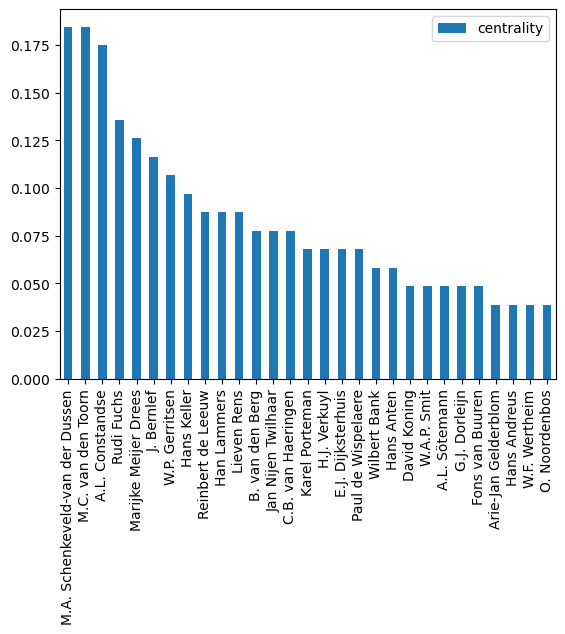

In [16]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 30 nodes
degree_df.sort_values('centrality', ascending=False)[0:29].plot(kind="bar")

<Axes: >

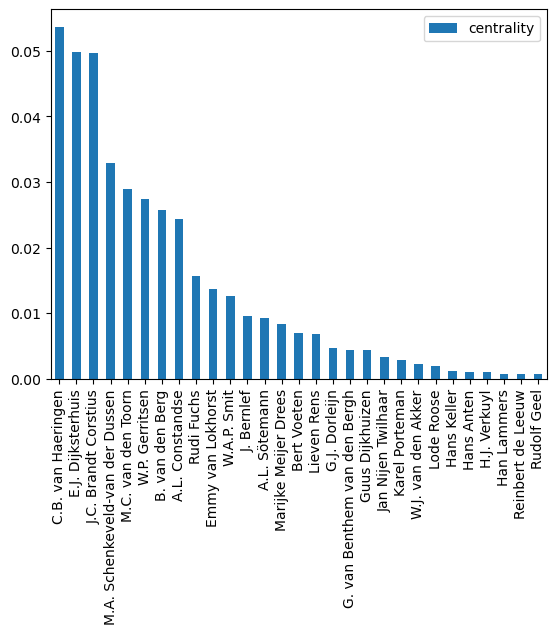

In [17]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 30 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:29].plot(kind="bar")

<Axes: >

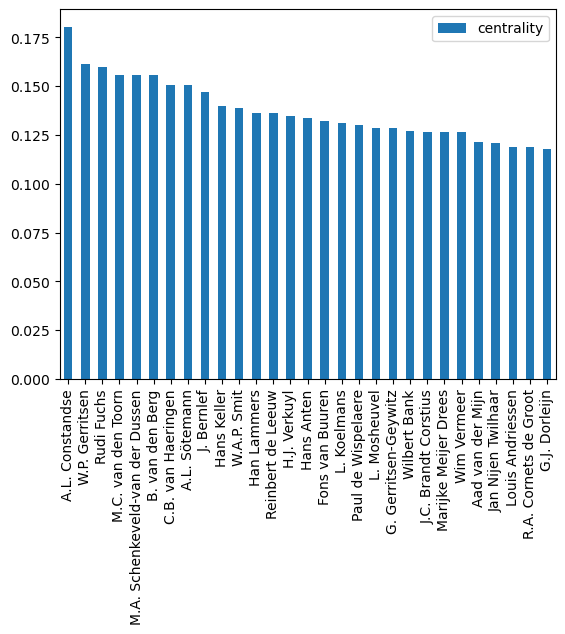

In [18]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 30 nodes
closeness_df.sort_values('centrality', ascending=False)[0:29].plot(kind="bar")

In [19]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

# Community detection

In [20]:
import community.community_louvain as community_louvain

communities = community_louvain.best_partition(G)
communities

{'Jan Sebastian Rabie': 1,
 'E.J. Dijksterhuis': 1,
 'B.A. van Groningen': 1,
 'Emmy van Lokhorst': 1,
 'A.N. Molenaar': 1,
 'K. Strijd': 1,
 'P. Geyl': 1,
 'J.C. Brandt Corstius': 2,
 'Bert Voeten': 1,
 'C.B. van Haeringen': 2,
 'Ed. Hoornik': 4,
 'W.A. Braasem': 4,
 'K. Schippers': 5,
 'J. Bernlef': 5,
 'Leo Vroman': 1,
 'Reinbert de Leeuw': 5,
 'Hans Andreus': 5,
 'A.L. Constandse': 5,
 'Han Lammers': 5,
 'Hans Keller': 5,
 'Arie de Froe': 5,
 'S.R. de Groot': 5,
 'Paul de Wispelaere': 5,
 'David Koning': 5,
 'Rudi Fuchs': 5,
 'Aad van der Mijn': 5,
 'Louis Andriessen': 5,
 'Wilbert Bank': 5,
 'G. van Benthem van den Bergh': 5,
 'Loden Vogel': 5,
 'R.A. Cornets de Groot': 5,
 'Bastiaan Willink': 5,
 'Rudolf Geel': 5,
 'Bram van der Lek': 5,
 'Guus Dijkhuizen': 5,
 'Wim Hazeu': 5,
 'Norbert Elias': 5,
 'Rein Bloem': 5,
 'Lodewijk Brunt': 7,
 'Emma Brunt': 7,
 'Marcel Janssens': 3,
 'Lode Roose': 3,
 'Stefaan Evenepoel': 9,
 'Erik Spinoy': 9,
 'Kamiel Vanhole': 10,
 'Koen Peeters': 10

In [21]:
# set communities as a node attribute
nx.set_node_attributes(G, communities, 'group')

# draw graph with communities
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("CCLAMP_communities.html")

CCLAMP_communities.html
